In [ ]:
!pip install contractions

In [ ]:
!pip install squarify

In [ ]:
!pip install -U textblob

In [ ]:
!python -m textblob.download_corpora

# Sentiment Analysis

 (Assisted by AI [Gemini 2.0 Flash & ChatGPT-4o])

In [ ]:
import nltk
import numpy as np
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#import package for Sentiment analysis
from textblob import TextBlob

### Upload GoogleDrive files

In [ ]:
# Connect Google drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read file on google drive
!ls "/content/drive/My Drive/DG: Colab Notebooks/Coding_files/"

f = open('/content/drive/My Drive/DG: Colab Notebooks/Coding_files/Hamburg_amigos_chat.txt', 'r')


Hamburg_amigos_chat.txt  Hybrid_Intelligence.txt


In [ ]:
# Read content
content = f.read()
f.close()


## Setup and Imports

In [ ]:
# Import necessary libraries
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import contractions
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import matplotlib as mpl

# Set better aesthetics for plots
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Download NLTK resources
nltk.download("wordnet", quiet=True)
nltk.download('punkt', quiet=True)

# install textblob translation requirements
try:
    import textblob
    textblob.download_corpora()
except:
    print("Note: Corpora wasn't able to download")

Note: Corpora wasn't able to download


## Functions

### 1. Text Preprocessing Functions

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to read and process WhatsApp chat data (with support for English and Spanish)
def process_whatsapp_chat(text):
    # Read all lines from the file
    lines = text.split('\n')

    print(f"Number of lines: {len(lines)}")

    # Extract messages from the WhatsApp chat format
    messages = []

    # Different possible patterns for WhatsApp chat exports
    patterns = [
        r'\d+/\d+/\d+,\s\d+:\d+\s[AP]M\s-\s[^:]+:\s(.*)',  # MM/DD/YY, h:mm AM/PM - Sender: Message
        r'\d+/\d+/\d+,\s\d+:\d+\s-\s[^:]+:\s(.*)',         # MM/DD/YY, HH:mm - Sender: Message
        r'\[\d+/\d+/\d+,\s\d+:\d+:\d+\]\s[^:]+:\s(.*)',    # [MM/DD/YY, HH:mm:ss] Sender: Message
        r'\d{2}/\d{2}/\d{4},\s\d{2}:\d{2}\s-\s[^:]+:\s(.*)', # DD/MM/YYYY, HH:MM - Sender: Message
        r'.*:\s(.*)' # Simple fallback pattern to extract anything after a colon
    ]

    for line in lines:
        # Skip empty lines or system messages
        if line.strip() and not '<Multimedia omitido>' in line:
            # Try each pattern until one matches
            message = None
            for pattern in patterns:
                match = re.search(pattern, line)
                if match:
                    message = match.group(1) # Capture message
                    break

            # If we found a message, process it
            if message:
                # Preprocess the message
                clean_message = preprocess_text(message)
                messages.append(clean_message)

    return messages

### 2. Sentiment Analysis - Polarity Function

In [ ]:
# Function to analyze sentiment with language detection and translation
def analyze_sentiment(text):
    # Try to detect the language
    try:
        from textblob import TextBlob
        blob = TextBlob(text)
        detected_language = blob.detect_language()
    except:
        # If language detection fails, assume English (fallback)
        detected_language = 'en'

    # For Spanish text, translate to English before sentiment analysis
    if detected_language == 'es':
        try:
            # Translate Spanish to English for better sentiment analysis
            english_text = str(blob.translate(from_lang='es', to='en'))
            analysis = TextBlob(english_text)
        except:
            # If translation fails, use original text
            analysis = TextBlob(text)
            print(f"Warning: Translation failed for text: {text[:30]}...")
    else:
        # For English and other languages, use TextBlob directly
        analysis = TextBlob(text)

    polarity = analysis.sentiment.polarity

    if polarity == 0:
        return 'Neutral'
    elif polarity > 0.75:
        return 'Strong Positive'
    elif polarity > 0.25:
        return 'Positive'
    elif polarity > 0:
        return 'Weak Positive'
    elif polarity > -0.25:
        return 'Weak Negative'
    elif polarity > -0.75:
        return 'Negative'
    else:
        return 'Strong Negative'

### 3. Subjectivity Analysis Function

In [ ]:
# Function to analyze subjectivity with language detection and translation
def analyze_subjectivity(text):
    # Try to detect the language
    try:
        from textblob import TextBlob
        blob = TextBlob(text)
        detected_language = blob.detect_language()
    except:
        # If language detection fails, assume English (fallback)
        detected_language = 'en'

    # For Spanish text, translate to English before subjectivity analysis
    if detected_language == 'es':
        try:
            # Translate Spanish to English for better subjectivity analysis
            english_text = str(blob.translate(from_lang='es', to='en'))
            analysis = TextBlob(english_text)
        except:
            # If translation fails, use original text
            analysis = TextBlob(text)
    else:
        # For English and other languages, use TextBlob directly
        analysis = TextBlob(text)

    subjectivity = analysis.sentiment.subjectivity

    if subjectivity <= 0.2:
        return 'Very Objective'
    elif subjectivity <= 0.4:
        return 'Objective'
    elif subjectivity <= 0.6:
        return 'Neutral'
    elif subjectivity <= 0.8:
        return 'Subjective'
    else:
        return 'Very Subjective'

### 5. Bonus: Functions for Average Scores

In [ ]:
# Function to calculate average polarity score
def avg_polarity_score(texts):
    polarity_scores = []
    for text in texts:
        polarity_scores.append(TextBlob(text).sentiment.polarity)
    avg_polarity = np.mean(polarity_scores)
    return avg_polarity

# Function to calculate average subjectivity score
def avg_subjectivity_score(texts):
    subjectivity_scores = []
    for text in texts:
        subjectivity_scores.append(TextBlob(text).sentiment.subjectivity)
    avg_subjectivity = np.mean(subjectivity_scores)
    return avg_subjectivity

## Data Processing

In [ ]:
# Load the WhatsApp chat file
# Replace with your actual file path
messages = process_whatsapp_chat(content)

# Print the number of messages processed (for verification)
print(f"Number of messages processed: {len(messages)}")

# Hide chat content in output as requested in the assignment
# Print just a few examples to verify processing
if messages:
    print("\nExample of preprocessed messages (first 3):")
    for i, msg in enumerate(messages[:3]):
        print(f"Message {i+1}: {msg[:50]}...")  # Show only first 30 chars

Number of lines: 516
Number of messages processed: 338

Example of preprocessed messages (first 3):
Message 1: Hiii...
Message 2: How are you guys...
Message 3: Someone has Samuels phone number...


## Sentiment Analysis and Counting Polarity Categories

In [ ]:
# Apply analyze_sentiment function to each message
sentiments = [analyze_sentiment(msg) for msg in messages]

# Count occurrences of each polarity category
sentiment_counts = {}
for sentiment in ['Strong Positive', 'Positive', 'Weak Positive', 'Neutral',
                 'Weak Negative', 'Negative', 'Strong Negative']:
    sentiment_counts[sentiment] = sentiments.count(sentiment) # Dictionary= sentiment:count

# Convert to DataFrame for easier visualization
sentiment_df = pd.DataFrame(list(sentiment_counts.items()),
                           columns=['Sentiment', 'Count'])

# Display counts
print("Sentiment Counts:")
print(sentiment_df)

Sentiment Counts:
         Sentiment  Count
0  Strong Positive      4
1         Positive     18
2    Weak Positive     11
3          Neutral    287
4    Weak Negative     10
5         Negative      8
6  Strong Negative      0


### Visualize Polarity Distribution

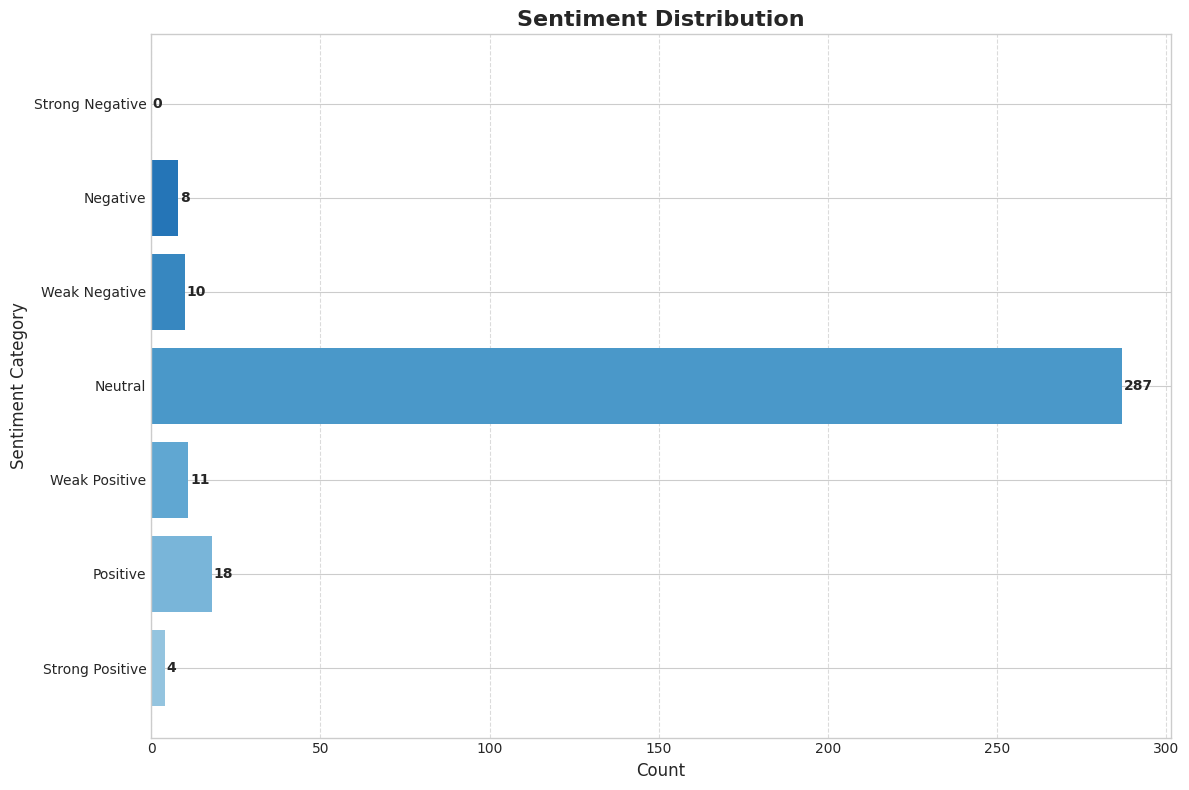

In [ ]:
# Create bar plot for sentiment distribution - Enhanced horizontal version
plt.figure(figsize=(12, 8))

# Create horizontal bar chart with gradient colors
sentiment_categories = sentiment_df['Sentiment']
counts = sentiment_df['Count']

# Create gradient colors (blue to green)
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(sentiment_categories)))

# Create horizontal bars
bars = plt.barh(sentiment_categories, counts, color=colors)

# Add count labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontweight='bold')

# Styling
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Sentiment Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Subjectivity Analysis and Counting Categories

In [ ]:
# Apply analyze_subjectivity function to each message
subjectivities = [analyze_subjectivity(msg) for msg in messages]

# Count occurrences of each subjectivity category
subjectivity_counts = {}
for subjectivity in ['Very Objective', 'Objective', 'Neutral',
                     'Subjective', 'Very Subjective']:
    subjectivity_counts[subjectivity] = subjectivities.count(subjectivity)

# Convert to DataFrame
subjectivity_df = pd.DataFrame(list(subjectivity_counts.items()),
                              columns=['Subjectivity', 'Count'])

# Display counts
print("Subjectivity Counts:")
print(subjectivity_df)

Subjectivity Counts:
      Subjectivity  Count
0   Very Objective    288
1        Objective     11
2          Neutral     16
3       Subjective      8
4  Very Subjective     15


### Visualize Subjectivity Distribution

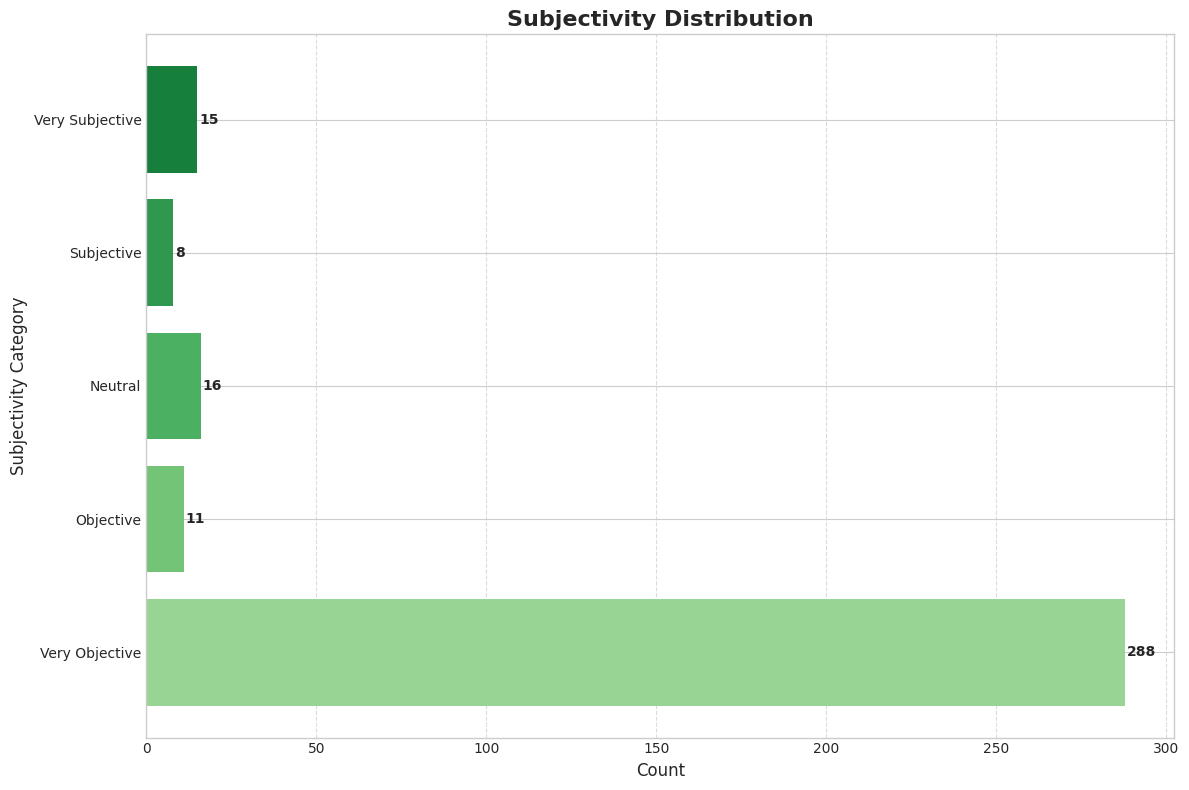

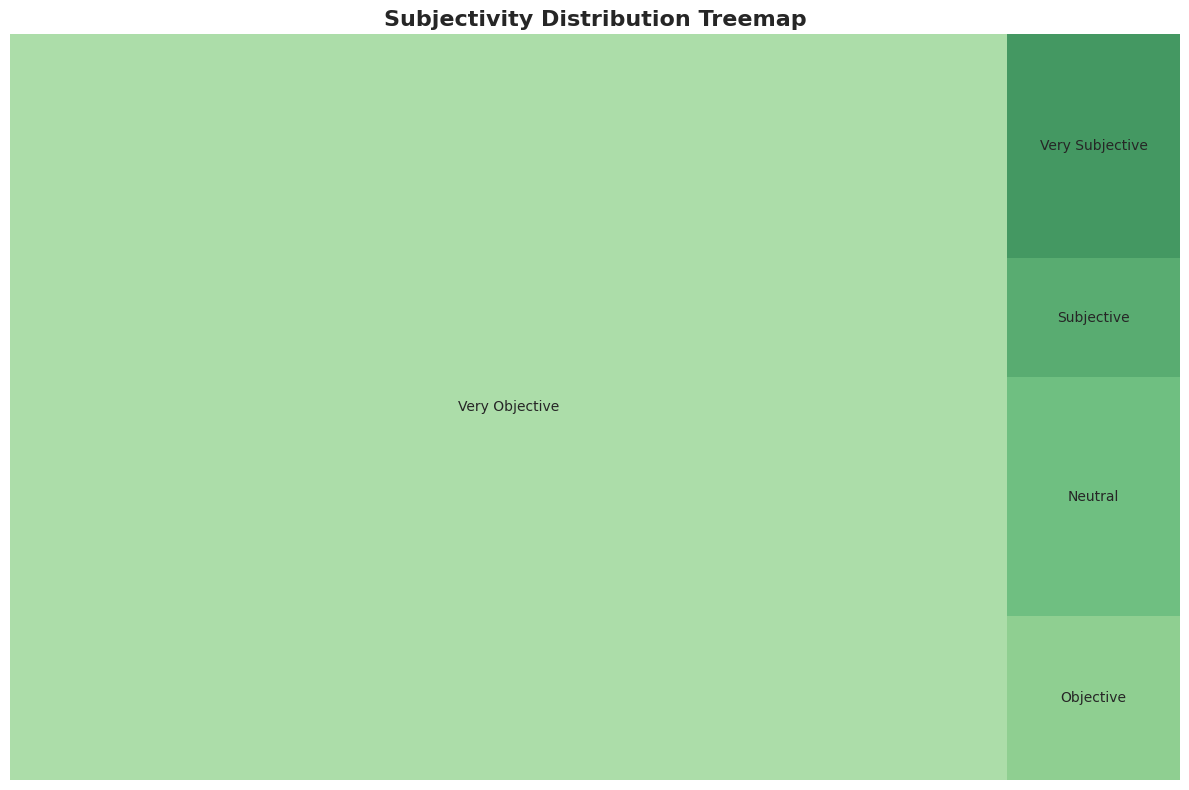

In [ ]:
# Create bar plot for subjectivity distribution - Enhanced horizontal version
plt.figure(figsize=(12, 8))

# Create horizontal bar chart with gradient colors
subjectivity_categories = subjectivity_df['Subjectivity']
counts = subjectivity_df['Count']

# Create gradient colors (green to orange)
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(subjectivity_categories)))

# Create horizontal bars
bars = plt.barh(subjectivity_categories, counts, color=colors)

# Add count labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontweight='bold')

# Styling
plt.title('Subjectivity Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Subjectivity Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Create a treemap for subjectivity distribution
try:
    plt.figure(figsize=(12, 8))

    # Calculate sizes proportionally
    sizes = counts / counts.sum() * 1000  # Scale for visibility

    # Create a treemap
    import squarify
    squarify.plot(sizes=sizes, label=subjectivity_categories, alpha=0.8,
                 color=plt.cm.Greens(np.linspace(0.4, 0.8, len(subjectivity_categories))))

    plt.axis('off')
    plt.title('Subjectivity Distribution Treemap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Note: squarify package is required for treemaps.")

## Calculate Average Sentiment & Subjectivity

In [ ]:
# Calculate average polarity
average_polarity = avg_polarity_score(messages)
print(f"Average Polarity: {average_polarity:.4f}")

# Calculate average subjectivity
average_subjectivity = avg_subjectivity_score(messages)
print(f"Average Subjectivity: {average_subjectivity:.4f}")

Average Polarity: 0.0282
Average Subjectivity: 0.0990


### Visualization

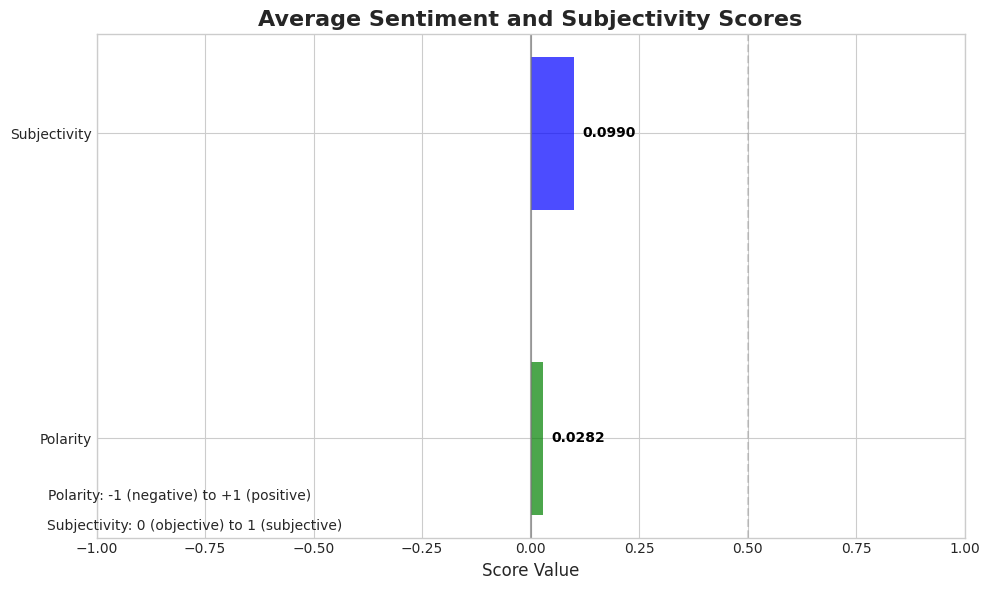

In [ ]:
# Create a visualization for the average scores
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart for average scores
labels = ['Polarity', 'Subjectivity']
values = [average_polarity, average_subjectivity]

# Define color based on value
polarity_color = 'green' if average_polarity > 0 else 'red'
colors = [polarity_color, 'blue']

# Create bars with gradient fills
bars = plt.barh(labels, values, color=colors, alpha=0.7, height=0.5)

# Add value labels
for bar in bars:
    width = bar.get_width()
    if width < 0:
        ha = 'right'
        x_pos = width - 0.02
    else:
        ha = 'left'
        x_pos = width + 0.02

    y_pos = bar.get_y() + bar.get_height()/2
    plt.text(x_pos, y_pos, f'{width:.4f}', ha=ha, va='center',
             fontweight='bold', color='black')

# Add reference line at 0
plt.axvline(x=0, color='grey', linestyle='-', alpha=0.7)

# Add reference line at 0.5 for subjectivity scale midpoint
plt.axvline(x=0.5, color='grey', linestyle='--', alpha=0.3)

# Set limits appropriate for the data
plt.xlim(-1, 1)

# Title and labels
plt.title('Average Sentiment and Subjectivity Scores', fontsize=16, fontweight='bold')
plt.xlabel('Score Value', fontsize=12)

# Add annotations explaining the scales
plt.annotate('Polarity: -1 (negative) to +1 (positive)',
             xy=(0.18, 0.15), xycoords='figure fraction',
             fontsize=10, ha='center')
plt.annotate('Subjectivity: 0 (objective) to 1 (subjective)',
             xy=(0.195, 0.1), xycoords='figure fraction',
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

## Results Summary

In [ ]:
# Summary of results
print("\nSummary of WhatsApp Chat Analysis:")
print("---------------------------------")
print(f"Total Messages Analyzed: {len(messages)}")
print(f"Average Polarity Score: {average_polarity:.4f}")
print(f"Average Subjectivity Score: {average_subjectivity:.4f}")
print("\nPolarity Distribution:")
for index, row in sentiment_df.iterrows():
    print(f"  {row['Sentiment']}: {row['Count']} messages")
print("\nSubjectivity Distribution:")
for index, row in subjectivity_df.iterrows():
    print(f"  {row['Subjectivity']}: {row['Count']} messages")


Summary of WhatsApp Chat Analysis:
---------------------------------
Total Messages Analyzed: 338
Average Polarity Score: 0.0282
Average Subjectivity Score: 0.0990

Polarity Distribution:
  Strong Positive: 4 messages
  Positive: 18 messages
  Weak Positive: 11 messages
  Neutral: 287 messages
  Weak Negative: 10 messages
  Negative: 8 messages
  Strong Negative: 0 messages

Subjectivity Distribution:
  Very Objective: 288 messages
  Objective: 11 messages
  Neutral: 16 messages
  Subjective: 8 messages
  Very Subjective: 15 messages
